Las variables categoricas que puedo llegar a tener en mi dataset podrían estár relacionadas entre si a modo de una jerarquía. Es decir, que el valor de una variable categorica se encuentra “dentro” o “debajo” de otra. 

Por ejemplo dentro de un continente existen varios países y dentro de un país existen varias ciudades. En este caso, existe una jerarquía. Si yo tuviera en mi dataset estas 3 variables por cada registro, yo podría analizar mis datos desde un punto de vista jerárquico. Como se van distribuyendo los valores numéricos a lo largo de cada uno de estos grupos, subgrupos, y sub-subgrupos. Otro ejemplo de variables jerarquicas serian corporaciónes, en donde una corporación puede ser dueña de muchas compañias. Otro caso también seria las especies y subespecies de animales. 

Una forma genial de analizar estas jerarquias es a través de visualizaciones. Como por ejemplo el Treemap. 

# Treemap
Es un gráfico jerárquico sin ejes. El gráfico realiza un "groupby" visual de varios niveles y muestra la variable numérica agregada resultante de cada agrupación como un cuadrado. El tamaño de este cuadrado es proporcional al valor de esta variable numérica agregada. 

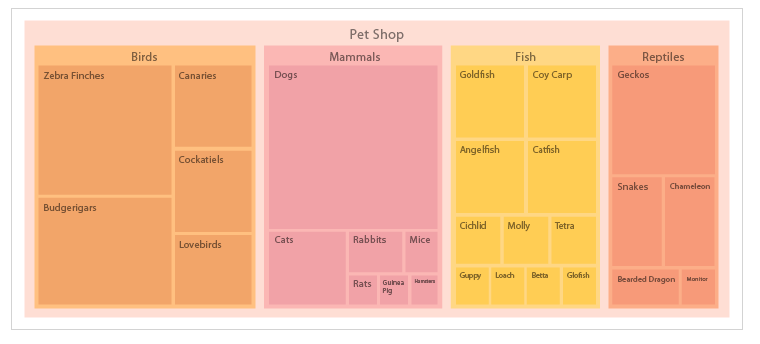


### Cuando utilizar
- Mi dataset tiene variables categóricas que codifican grupos de una manera jerárquica (es decir, una variable categórica, es hija, o se encuentra dentro de, otra variable categórica). 
- Y quiero conocer las diferencias entre las **magnitudes** de los valores de la variable numérica agregadas dentro de estos diferentes grupos.

### Cuando no utilizar
- Si mis variables categóricas jerárquicas a agrupar son temporales, por ejemplo, años - meses - dias, no es común hacer un treemap (y en realidad ninguna visualización jerárquica) para estos casos. En estos casos sería preferible un gráfico de líneas múltiples para ver las diferencias a través del tiempo.
- Si quiero visualizar las diferencias de las **proporciones** entre los grupos de un mismo nivel, un treemap no es la mejor opción. En este caso podemos considerar utilizar un Sunburst.


### Consejos
- Es común utilizar colores en el gráfico para distinguir cada categoría en el primer nivel de la jerarquía. También se pueden utilizar los colores para codificar la variable numérica o una segunda variable numérica relacionada a los grupos.
- Podría ser una alternativa a un Gráfico de Barras con muchas categorias. Sin embargo, perdemos bastante presición. Aún mas si las magnitudes son similares entre sí.

## En esta clase
### Datos
1. Dataset 1: Información de expectativa de vida y población sobre paises del mundo a lo largo de los años
2. Dataset 2: Número de mensajes extraidos de Facebook publicados en páginas de marcas de retail   

### Objetivos
1. Visualizar la diferencia de la población a lo largo de los países del mundo en el año 2007.
2. Visualizar la diferencia entre la proporción de mensajes obtenidos en cada página de marca de retail por el tipo de tienda.

## Referencias
- https://datavizcatalogue.com/methods/treemap.html

In [1]:
import pandas as pd
import plotly.express as px

# Algunos ambientes van a necesitar este modo para poder visualizar los graficos de Plotly
import plotly
plotly.offline.init_notebook_mode(connected=True)

In [2]:
# Leemos los datos con Pandas
df = pd.read_csv('../data/paises_vida.csv')
df = df.dropna()
df = df[df['year'] == 2007]
df

,index,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
11,11,Afghanistan,Asia,2007,43.828,31889923,974.580338,AFG,4
23,23,Albania,Europe,2007,76.423,3600523,5937.029526,ALB,8
35,35,Algeria,Africa,2007,72.301,33333216,6223.367465,DZA,12
47,47,Angola,Africa,2007,42.731,12420476,4797.231267,AGO,24
59,59,Argentina,Americas,2007,75.320,40301927,12779.379640,ARG,32
...,...,...,...,...,...,...,...,...,...
1655,1655,Vietnam,Asia,2007,74.249,85262356,2441.576404,VNM,704
1667,1667,West Bank and Gaza,Asia,2007,73.422,4018332,3025.349798,PSE,275
1679,1679,"Yemen, Rep.",Asia,2007,62.698,22211743,2280.769906,YEM,887
1691,1691,Zambia,Africa,2007,42.384,11746035,1271.211593,ZMB,894


In [3]:
#df.groupby(['continent', 'country']).agg({'pop': 'sum'}).plot.bar(figsize=(15, 5))

In [4]:
# Treemap en Plotly
# https://plotly.com/python/treemaps/
fig = px.treemap(
    df, 
    path=[px.Constant("Mundo"), 'continent', 'country'], 
    values='pop',
    color='lifeExp', # Codificamos una segunda variable numérica utilizando colores
    color_continuous_scale='RdBu',
)
fig.show()

In [5]:
df2 = pd.read_csv('../data/marcas_mensajes.csv')
df2

,tipo,marca,n_mensajes
0,Apparel,Burberry,12767
1,Apparel,Calvin Klein,6515
2,Apparel,Forever 21,34460
3,Apparel,Lacoste,8862
4,Apparel,Ross,8139
...,...,...,...
81,Sporting Goods,Nike,21776
82,Supermarket,Albertsons,10649
83,Supermarket,Kroger,25714
84,Supermarket,WholeFoods,62112


<Axes: xlabel='tipo,marca'>

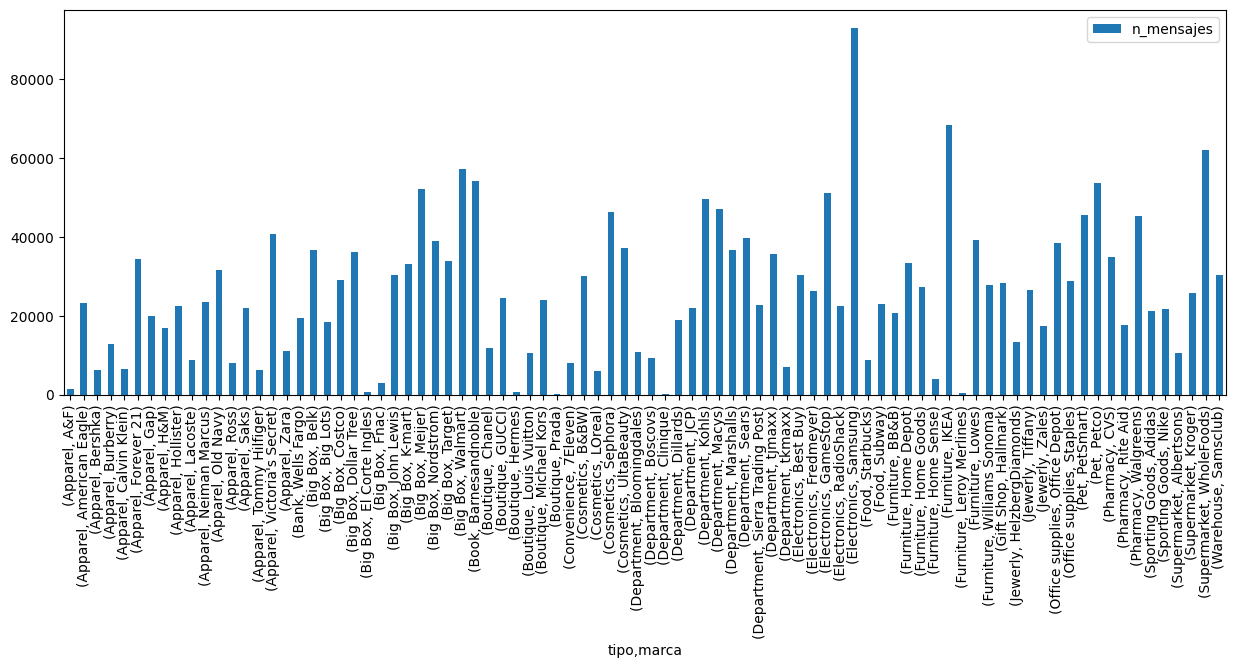

In [6]:
df2.groupby(['tipo', 'marca']).agg({'n_mensajes': 'sum'}).plot.bar(figsize=(15, 5))

In [7]:
fig = px.treemap(
    df2, 
    path=[px.Constant("Todos"), 'tipo', 'marca'], 
    values='n_mensajes'
)
fig.data[0].textinfo = 'label+text+value'
fig.show()